In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

import warnings

In [6]:
warnings.filterwarnings("ignore")

# Loading the data

In [7]:
data_path = 'Data/'

In [8]:
train_beneficiary_data = pd.read_csv(f'{data_path}/Train_Beneficiarydata-1542865627584.csv')
train_beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [9]:
train_inpatient_data = pd.read_csv(f'{data_path}/Train_Inpatientdata-1542865627584.csv')
train_inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [10]:

train_outpatient_data = pd.read_csv(f'{data_path}/Train_Outpatientdata-1542865627584.csv')
train_outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [11]:
train_data = pd.read_csv(f'{data_path}/Train-1542865627584.csv')
train_data.head()


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [12]:
train_data.shape

(5410, 2)

In [13]:
test_beneficiary_data = pd.read_csv(f'{data_path}/Test_Beneficiarydata-1542969243754.csv')
test_beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [14]:
test_inpatient_data = pd.read_csv(f'{data_path}/Test_Inpatientdata-1542969243754.csv')
test_inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test_outpatient_data = pd.read_csv(f'{data_path}/Test_Outpatientdata-1542969243754.csv')
test_outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [16]:
test_data = pd.read_csv(f'{data_path}/Test-1542969243754.csv')
test_data.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


### Check for class imbalance in the 'PotentialFraud' column

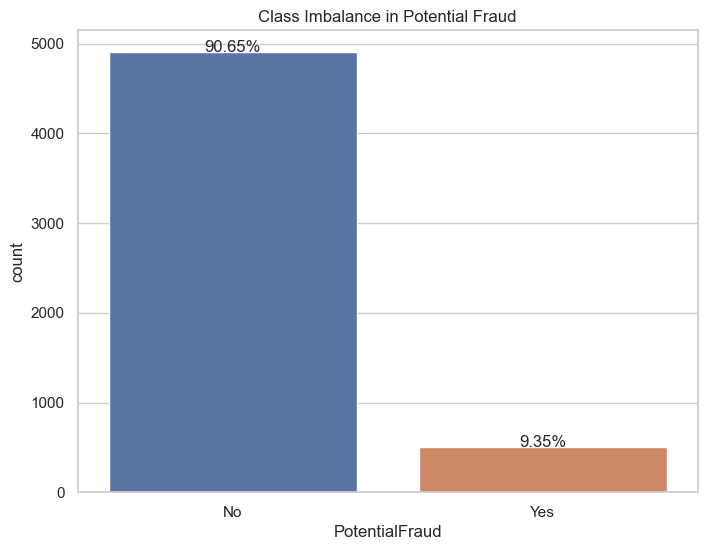

In [91]:
# Calculate class percentages
class_counts = train_data['PotentialFraud'].value_counts()
total_samples = class_counts.sum()
class_percentages = [(count / total_samples) * 100 for count in class_counts]

# Plot countplot with percentage labels
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='PotentialFraud', data=train_data)
plt.title('Class Imbalance in Potential Fraud')

# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.2,
            f'{class_percentages[i]:.2f}%',
            ha="center")

plt.show()

### Encoding Categorical Columns

In [18]:
# Encoding Categorical Columns
def encode_categorical_columns(data_frame, columns_to_encode):
    label_encoder = LabelEncoder()
    for col in columns_to_encode:
        if col in data_frame.columns:
            if data_frame[col].dtype != 'object':
                data_frame[col] = data_frame[col].astype(str)
            data_frame[col] = label_encoder.fit_transform(data_frame[col])

In [19]:
columns_to_encode = ['Gender', 'Race', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                     'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
                     'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
                     'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

encode_categorical_columns(train_beneficiary_data, columns_to_encode)
encode_categorical_columns(test_beneficiary_data, columns_to_encode)

In [20]:
# Helper functions
def na_replace_columns(df, col_list, fill_value='None'):
    for col in col_list:
        fill_value = 0 if df[col].dtype != 'object' else fill_value
        df[col] = df[col].fillna(fill_value)

In [21]:
# Function to create new features related to beneficiaries' data
def create_beneficiary_features(df):
    # Adding a column to indicate whether the beneficiary is deceased or not
    df['Deceased'] = np.where((df['DOD'].replace(np.nan,'rep') == 'rep'), 0, 1)

    # Converting date columns to datetime format
    df['DOD'] = pd.to_datetime(df['DOD'])
    df['DOB'] = pd.to_datetime(df['DOB'])

    # Calculating beneficiary age based on date of birth and death
    df['Age'] = round(((df['DOD'] - df['DOB']).dt.days)/365)
    df['Age'] = df['Age'].fillna(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d') - df['DOB']).dt.days)/365)
    df['Age'] = df['Age'].astype(int)

    # Creating columns for total reimbursed and deductible amounts
    df['Tot_Reimbursed_Amt'] = df['IPAnnualReimbursementAmt'] + df['OPAnnualReimbursementAmt']	
    df['Tot_Deductible_Amt'] = df['IPAnnualDeductibleAmt'] + df['OPAnnualReimbursementAmt'] 

    # Extracting year, month, and day from date of birth
    df['DOB_year'] = df['DOB'].dt.year
    df['DOB_month'] = df['DOB'].dt.month
    df['DOB_day'] = df['DOB'].dt.day

In [22]:
create_beneficiary_features(train_beneficiary_data)
create_beneficiary_features(test_beneficiary_data)

In [23]:
train_beneficiary_data.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',\
                      'IPAnnualDeductibleAmt','OPAnnualDeductibleAmt'], axis=1, inplace=True)\

test_beneficiary_data.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',\
                      'IPAnnualDeductibleAmt','OPAnnualDeductibleAmt'], axis=1, inplace=True)

In [24]:
# Concatenate train and test beneficiary data
merged_beneficiary_data = pd.concat([train_beneficiary_data, test_beneficiary_data], ignore_index=True)

# Remove duplicate rows
merged_beneficiary_data.drop_duplicates(inplace=True)

In [25]:
merged_beneficiary_data.head()

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
0,BENE11001,0,0,0,39,230,12,12,0,1,...,1,0,0,0,66,36060,3264,1943,1,1
1,BENE11002,1,0,0,39,280,12,12,1,1,...,1,1,1,0,73,30,30,1936,9,1
2,BENE11003,0,0,0,52,590,12,12,0,1,...,1,1,1,0,73,90,90,1936,8,1
3,BENE11004,0,0,0,39,270,12,12,0,0,...,0,0,1,0,87,1810,1810,1922,7,1
4,BENE11005,0,0,0,24,680,12,12,1,1,...,1,1,1,0,74,1790,1790,1935,9,1


<Axes: >

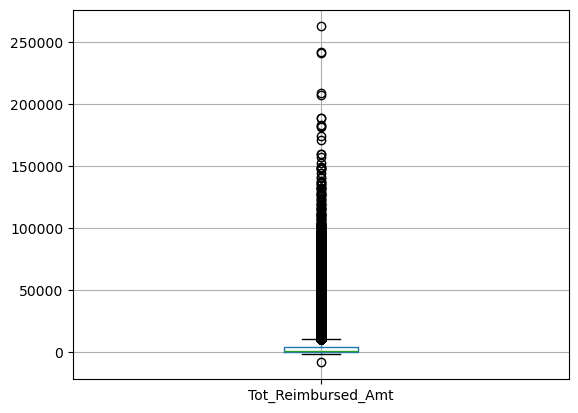

In [26]:
merged_beneficiary_data[['Tot_Reimbursed_Amt']].boxplot()

<Axes: >

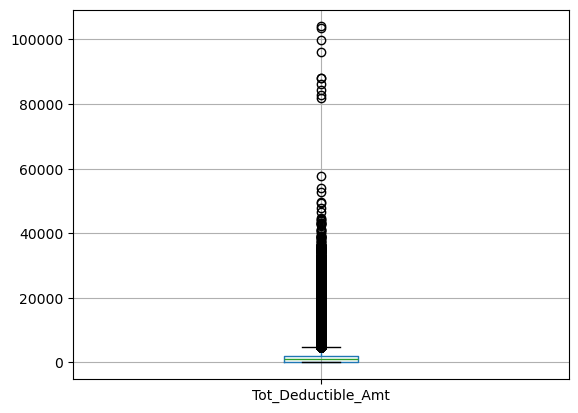

In [27]:
merged_beneficiary_data[['Tot_Deductible_Amt']].boxplot()

In [28]:
merged_beneficiary_data.loc[merged_beneficiary_data.Tot_Reimbursed_Amt > 250000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
135300,BENE155688,1,0,0,19,440,12,12,1,0,...,1,1,0,0,90,262720,103386,1919,12,1


In [29]:
sns.set(rc={"figure.figsize":(12, 8)})

In [30]:
def plot_distribution(data, column, title='', x_label='', color='g'):
    sns.set_theme(style='whitegrid')
    sns.distplot(data[column], kde=True, kde_kws={"color": color, "alpha": 0.3, "linewidth": 2, "shade": True})\
        .set_title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=15)
    plt.show()

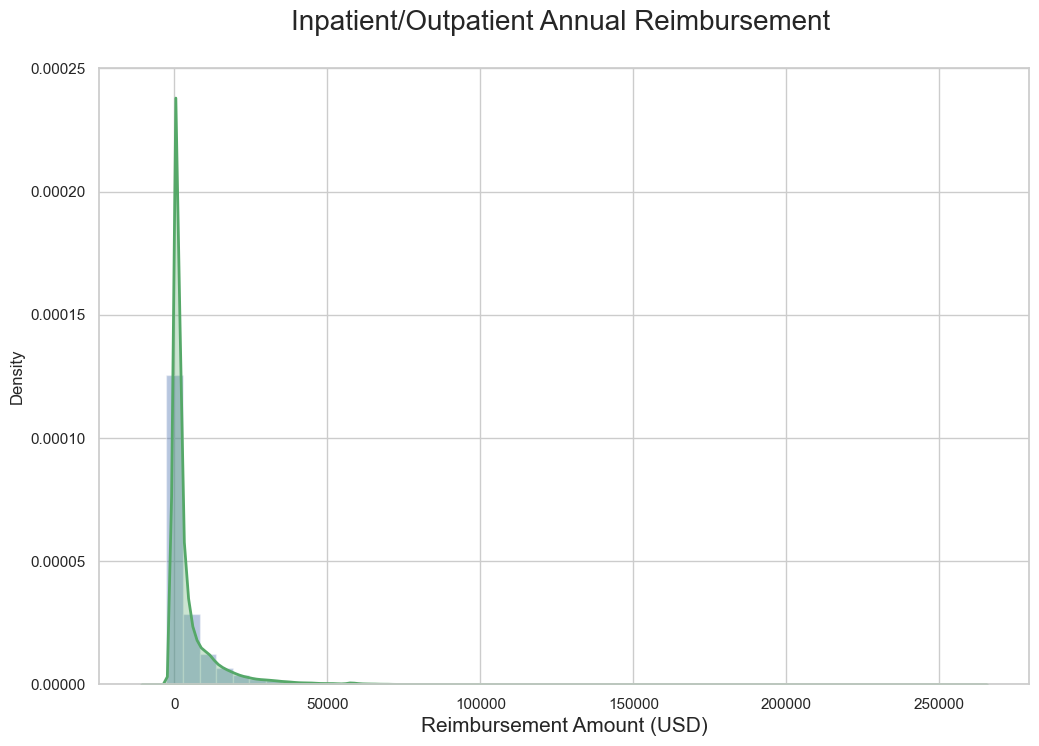

In [31]:
# Plotting the distribution for Total Reimbursement Amount
plot_distribution(merged_beneficiary_data, "Tot_Reimbursed_Amt", 
                  title="Inpatient/Outpatient Annual Reimbursement \n",
                  x_label="Reimbursement Amount (USD)")

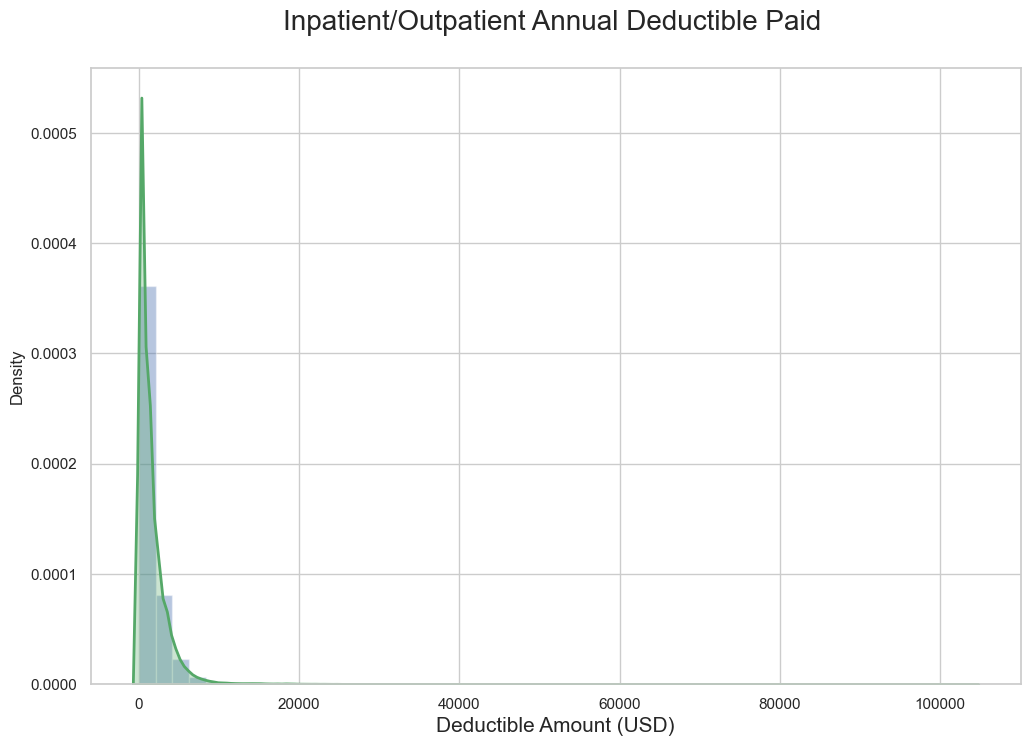

In [32]:
# Plotting the distribution for Total Deductible Amount
plot_distribution(merged_beneficiary_data, "Tot_Deductible_Amt", 
                  title="Inpatient/Outpatient Annual Deductible Paid \n",
                  x_label="Deductible Amount (USD)")

In [33]:
merged_beneficiary_data.loc[merged_beneficiary_data.Tot_Reimbursed_Amt > 150000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
2500,BENE13669,0,1,0,34,730,12,12,1,0,...,1,1,1,0,68,242360,104028,1941,5,1
2849,BENE14036,1,1,0,33,770,12,12,1,0,...,1,0,1,0,92,152780,6336,1917,7,1
10411,BENE22137,0,0,1,10,510,12,12,0,0,...,0,1,1,0,82,159470,11530,1927,1,1
13375,BENE25318,0,0,0,5,370,12,12,1,0,...,1,1,0,0,71,188650,86228,1938,9,1
62365,BENE77765,1,0,0,17,550,12,12,1,1,...,1,1,1,0,89,188980,88048,1920,2,1
67669,BENE83465,1,0,1,4,490,12,12,1,0,...,1,1,1,0,56,171190,29086,1953,9,1
91564,BENE108968,1,0,0,34,400,12,12,1,0,...,0,1,1,0,82,208960,88096,1927,10,1
93621,BENE111157,1,1,0,1,360,12,12,1,0,...,1,1,1,0,61,241510,99646,1948,7,1
95013,BENE112649,0,0,1,38,250,12,12,0,0,...,1,1,0,0,69,174240,20776,1940,1,1
99998,BENE117983,0,0,1,33,420,12,12,0,0,...,0,0,0,0,83,157500,42950,1926,6,1


In [34]:
merged_beneficiary_data.loc[merged_beneficiary_data.Tot_Deductible_Amt > 60000,:]

,BeneID,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Deceased,Age,Tot_Reimbursed_Amt,Tot_Deductible_Amt,DOB_year,DOB_month,DOB_day
2500,BENE13669,0,1,0,34,730,12,12,1,0,...,1,1,1,0,68,242360,104028,1941,5,1
13375,BENE25318,0,0,0,5,370,12,12,1,0,...,1,1,0,0,71,188650,86228,1938,9,1
62365,BENE77765,1,0,0,17,550,12,12,1,1,...,1,1,1,0,89,188980,88048,1920,2,1
91564,BENE108968,1,0,0,34,400,12,12,1,0,...,0,1,1,0,82,208960,88096,1927,10,1
93621,BENE111157,1,1,0,1,360,12,12,1,0,...,1,1,1,0,61,241510,99646,1948,7,1
112038,BENE130861,0,0,0,44,480,12,6,0,1,...,1,1,0,0,81,182160,84228,1928,8,1
126846,BENE146654,1,0,0,31,100,12,12,1,1,...,0,0,0,0,84,207350,95978,1925,3,1
135300,BENE155688,1,0,0,19,440,12,12,1,0,...,1,1,0,0,90,262720,103386,1919,12,1
147671,BENE32122,1,0,0,5,200,12,12,1,0,...,1,1,1,0,89,183600,82668,1920,7,1
188982,BENE127888,1,1,0,33,320,12,12,1,1,...,1,1,1,0,80,181800,81868,1929,8,1


In [35]:
def plot_bar_chart_with_values(data, x, y, title='', x_label='', y_label='', orient='v', space=0.05, color=None):
    def show_values(axs):
        def _single(ax):
            if orient == "v":
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                    value = '{:.2f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center") 
            elif orient == "h":
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                    value = '{:.2f}'.format(p.get_width())
                    ax.text(_x, _y, value, ha="left")

        if isinstance(axs, np.ndarray):
            for idx, ax in np.ndenumerate(axs):
                _single(ax)
        else:
            _single(axs)
            
    order = data.groupby(x)[y]\
           .median().sort_values(ascending=False).head(10).index

    sns.set_theme(style='whitegrid')
    if orient == 'v':
        plot = sns.barplot(data=data, x=x, y=y, order=order, palette=color)
    elif orient == 'h':
        plot = sns.barplot(data=data, y=x, x=y, order=order, palette=color)
    show_values(plot)
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()

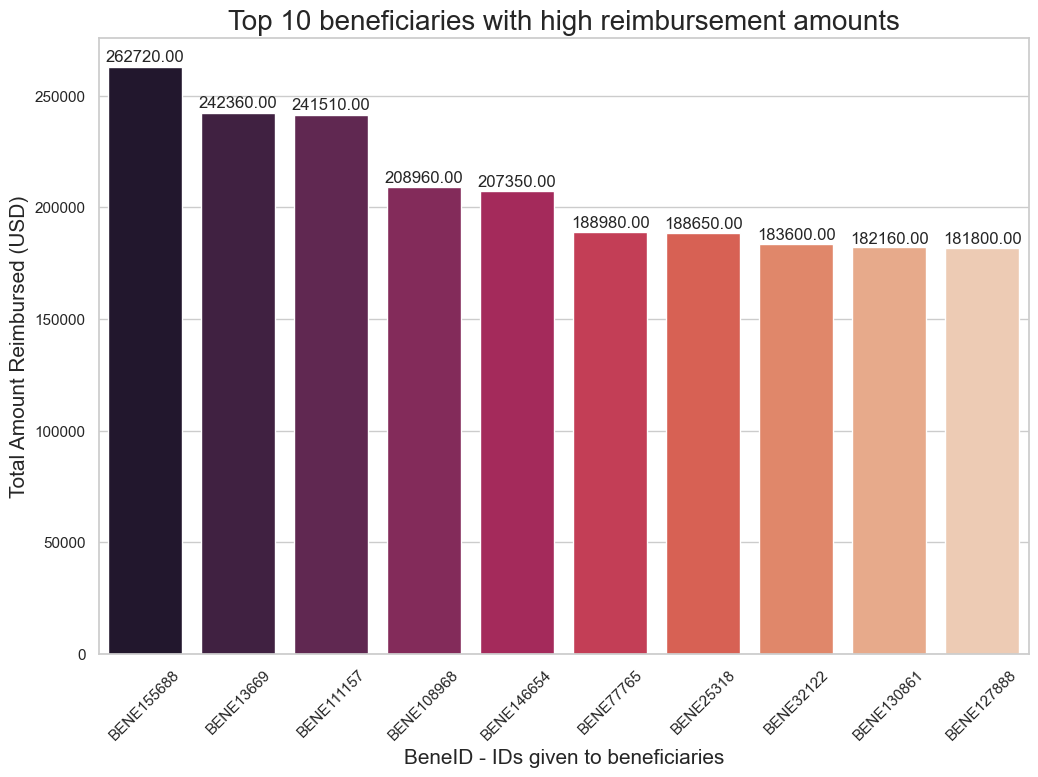

In [36]:
plot_bar_chart_with_values(merged_beneficiary_data, x='BeneID', y='Tot_Reimbursed_Amt', 
                           title = "Top 10 beneficiaries with high reimbursement amounts",
                           x_label='BeneID - IDs given to beneficiaries', y_label='Total Amount Reimbursed (USD)', color = 'rocket')

In [37]:
merged_beneficiary_data.groupby('BeneID')['Tot_Reimbursed_Amt']\
           .median().sort_values(ascending=False).head(10)

BeneID
BENE155688    262720.0
BENE13669     242360.0
BENE111157    241510.0
BENE108968    208960.0
BENE146654    207350.0
BENE77765     188980.0
BENE25318     188650.0
BENE32122     183600.0
BENE130861    182160.0
BENE127888    181800.0
Name: Tot_Reimbursed_Amt, dtype: float64

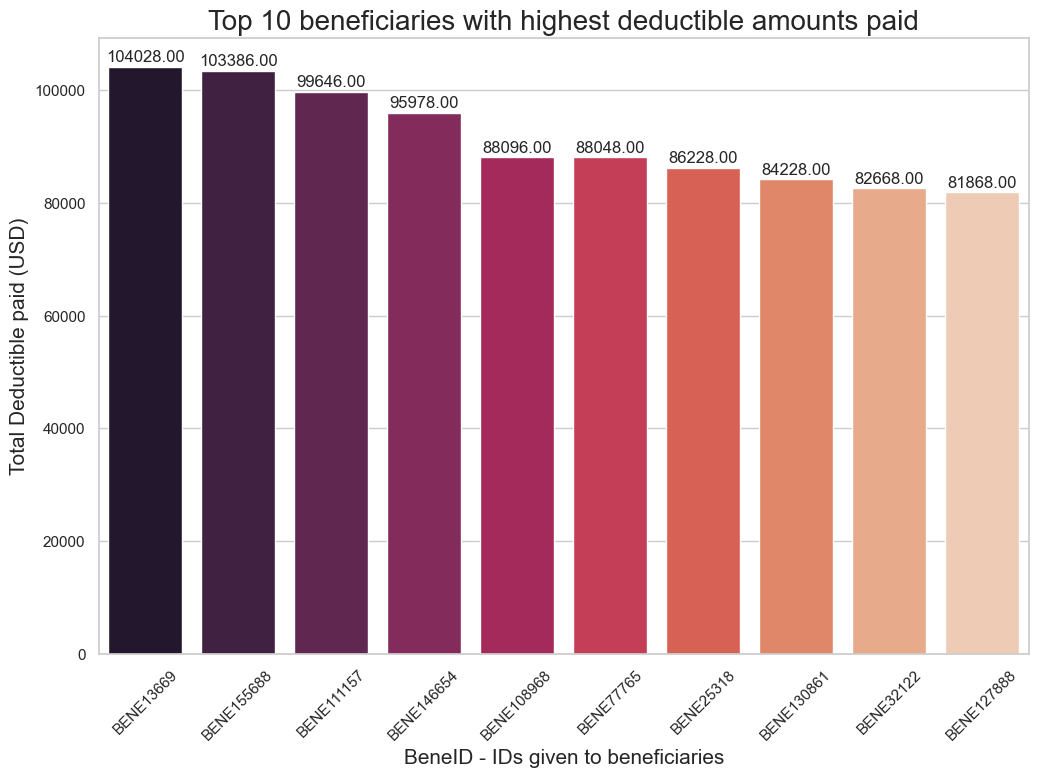

In [38]:

plot_bar_chart_with_values(merged_beneficiary_data, x='BeneID', y='Tot_Deductible_Amt', 
                           title = "Top 10 beneficiaries with highest deductible amounts paid",
                           x_label='BeneID - IDs given to beneficiaries', y_label='Total Deductible paid (USD)', color = 'rocket')

In [39]:
merged_beneficiary_data.groupby('BeneID')['Tot_Deductible_Amt']\
           .median().sort_values(ascending=False).head(10)

BeneID
BENE13669     104028.0
BENE155688    103386.0
BENE111157     99646.0
BENE146654     95978.0
BENE108968     88096.0
BENE77765      88048.0
BENE25318      86228.0
BENE130861     84228.0
BENE32122      82668.0
BENE127888     81868.0
Name: Tot_Deductible_Amt, dtype: float64

### Looking at the ailments reported among top beneficiaries

In [40]:
ds_df = merged_beneficiary_data[['BeneID','RenalDiseaseIndicator','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',\
                   'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary','ChronicCond_Depression', 'ChronicCond_Diabetes',\
                   'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']]


id_list = ['BENE13669','BENE155688','BENE111157',\
           'BENE146654','BENE108968','BENE77765',\
           'BENE25318','BENE130861']

ds_df[ds_df['BeneID'].isin(id_list)]

,BeneID,RenalDiseaseIndicator,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
2500,BENE13669,0,0,1,1,1,1,1,0,1,1,1
13375,BENE25318,0,0,1,1,1,1,1,0,1,1,0
62365,BENE77765,0,1,0,0,0,1,1,0,1,1,1
91564,BENE108968,0,0,1,0,0,0,0,0,0,1,1
93621,BENE111157,0,0,1,1,0,0,0,0,1,1,1
112038,BENE130861,0,1,1,1,1,1,1,0,1,1,0
126846,BENE146654,0,1,0,0,0,0,0,0,0,0,0
135300,BENE155688,0,0,0,1,1,1,0,0,1,1,0


In [41]:
merged_inpatient_data = pd.concat([train_inpatient_data, test_inpatient_data], ignore_index=True)

# Remove duplicate rows
merged_inpatient_data.drop_duplicates(inplace=True)

<Axes: >

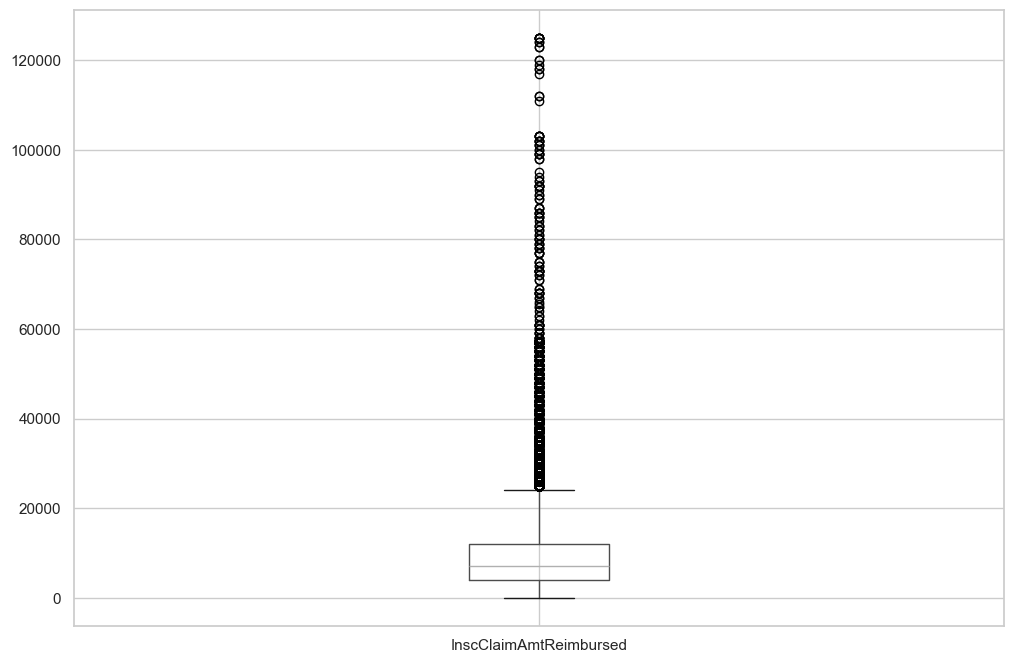

In [42]:
merged_inpatient_data[['InscClaimAmtReimbursed']].boxplot()

<Axes: >

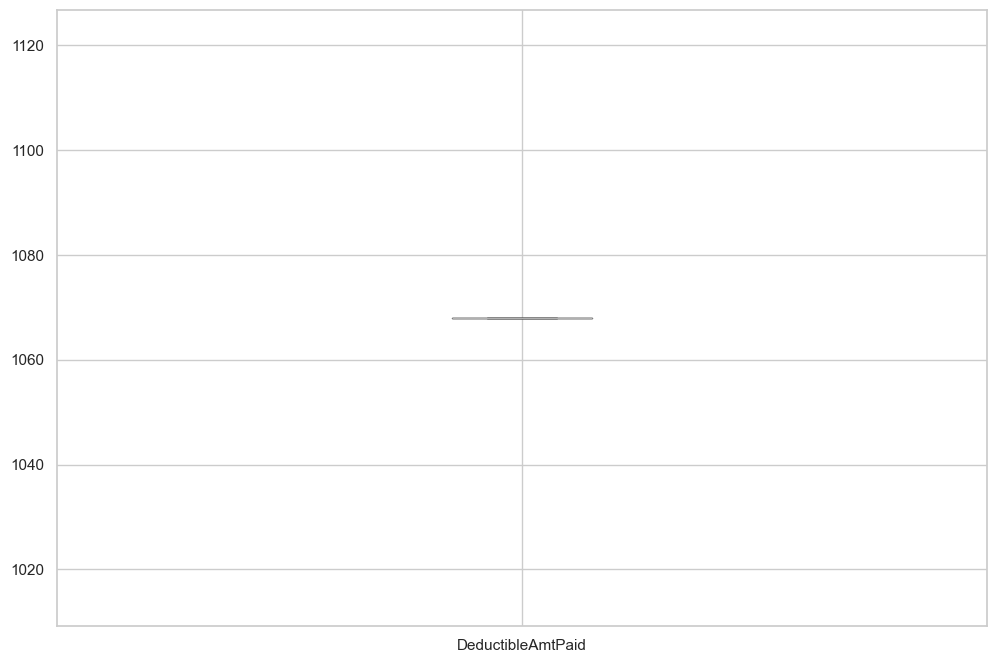

In [43]:
merged_inpatient_data[['DeductibleAmtPaid']].boxplot()

### Removing columns with high null values

In [44]:
merged_inpatient_data.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)

In [45]:
def code_count(df, diagnosis_columns, procedure_columns):
    # Counting diagnosis codes per provider
    diag_cnt_df = df[['Provider'] + diagnosis_columns].drop_duplicates()
    for col in diagnosis_columns:
        diag_cnt_df = diag_cnt_df.loc[diag_cnt_df[col] != 'None']

    diag_cnt_df = diag_cnt_df.groupby('Provider').size().reset_index(name='Diag_Code_Cnt')

    # Counting procedure codes per provider
    proc_cnt_df = df[['Provider'] + procedure_columns].drop_duplicates()
    for col in procedure_columns:
        proc_cnt_df = proc_cnt_df.loc[proc_cnt_df[col] != 'None']

    proc_cnt_df = proc_cnt_df.groupby('Provider').size().reset_index(name='Proc_Code_Cnt')

    # Merging counts with original DataFrame
    df = df.merge(diag_cnt_df, on='Provider', how='left').fillna(0)
    df = df.merge(proc_cnt_df, on='Provider', how='left').fillna(0)

    df['Diag_Code_Cnt'] = df['Diag_Code_Cnt'].astype(int)
    df['Proc_Code_Cnt'] = df['Proc_Code_Cnt'].astype(int)

In [46]:
diagnosis_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                     'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                     'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']

procedure_columns = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3']

code_count(merged_inpatient_data, diagnosis_columns, procedure_columns)

### Impute Missing values

In [47]:
na_replace_cols = ['DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                   'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                   'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
                   'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmAdmitDiagnosisCode', 'AttendingPhysician',
                   'OperatingPhysician', 'OtherPhysician']

In [48]:
na_replace_columns(merged_inpatient_data, na_replace_cols)

In [49]:
# Concatenate train_outpatient and test_outpatient data
merged_outpatient_data = pd.concat([train_outpatient_data, test_outpatient_data], ignore_index=True)

# Drop duplicate rows
merged_outpatient_data.drop_duplicates(inplace=True)

In [50]:
merged_outpatient_data.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)

In [51]:
code_count(merged_outpatient_data, diagnosis_columns, procedure_columns)

In [52]:
na_replace_columns(merged_outpatient_data, na_replace_cols)

<Axes: >

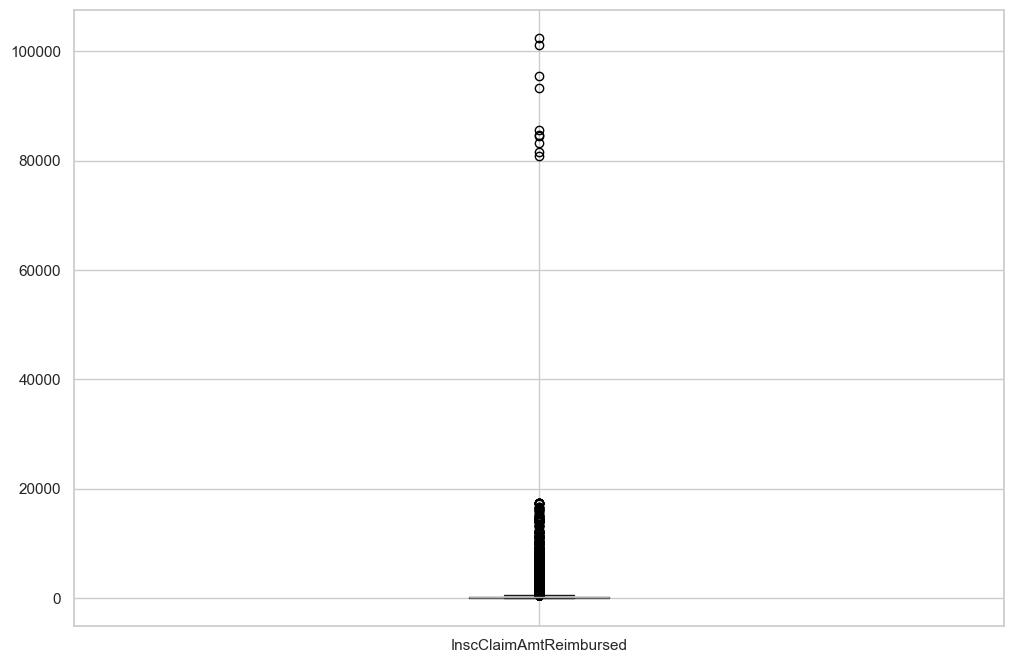

In [53]:
merged_outpatient_data[['InscClaimAmtReimbursed']].boxplot()

<Axes: >

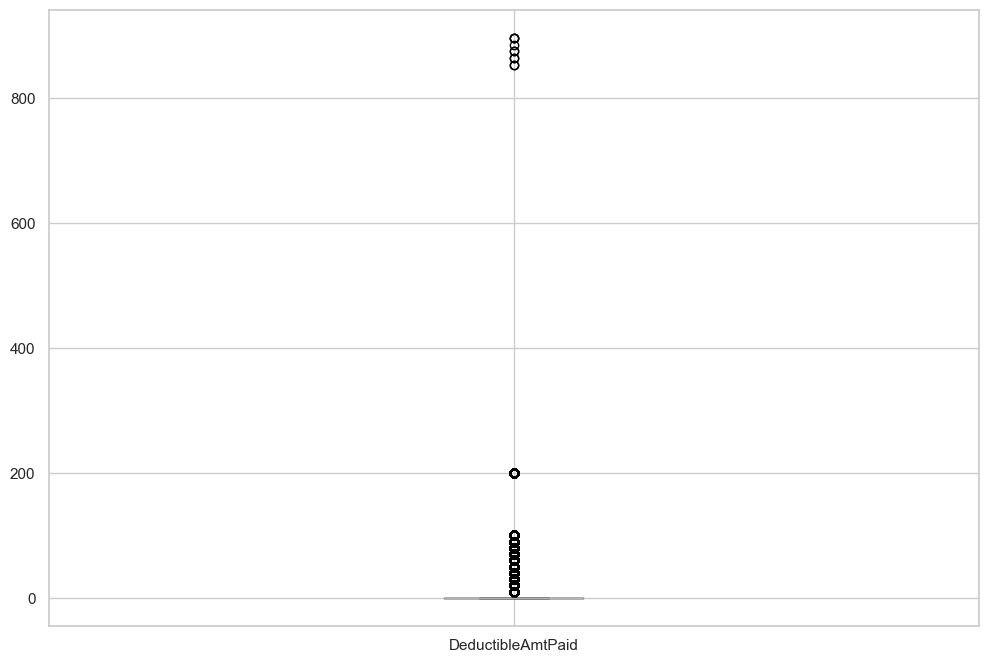

In [54]:
merged_outpatient_data[['DeductibleAmtPaid']].boxplot()

In [55]:
merged_outpatient_data.loc[merged_outpatient_data.InscClaimAmtReimbursed > 80000,:]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode
9326,BENE13669,CLM82013,2009-09-14,2009-10-07,PRV55172,102500,PHY387333,PHY432582,0,41011,...,48282,51881,0,0,0,4573.0,3811.0,0.0,876,85186
50435,BENE25318,CLM82009,2009-01-17,2009-01-22,PRV51399,84460,PHY355989,PHY371138,0,431,...,51881,3315,99739,0380,2639,239.0,0.0,0.0,876,3315
232849,BENE77765,CLM82012,2009-07-13,2009-07-13,PRV53114,85680,PHY356002,PHY401806,0,51884,...,49121,42731,0,0,0,9671.0,0.0,0.0,897,51881
341672,BENE108968,CLM82011,2009-12-15,2009-12-22,PRV55205,84660,PHY322242,PHY329158,PHY355985,0389,...,2762,78552,4019,5990,0,9672.0,0.0,0.0,886,0389
349263,BENE111157,CLM82006,2008-12-15,2008-12-28,PRV51119,95580,PHY409901,PHY396304,PHY396304,0389,...,51881,51883,5722,99591,2762,9672.0,5119.0,0.0,865,51881
418824,BENE130861,CLM82014,2009-08-27,2009-09-01,PRV56507,83160,PHY395085,PHY365635,0,3962,...,41402,4412,41401,53081,0,3522.0,9971.0,0.0,897,4241
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,0,4280,...,V1051,99672,40391,04111,0,51.0,0.0,0.0,865,4280
535809,BENE32122,CLM82005,2009-03-28,2009-03-28,PRV51407,81600,PHY412004,PHY335869,0,51884,...,49121,42731,0,0,0,9671.0,0.0,0.0,854,51881
617012,BENE127888,CLM82008,2009-07-01,2009-07-24,PRV54980,80800,PHY343395,PHY328132,0,4821,...,5789,486,51884,34830,0,9672.0,0.0,0.0,854,51881
632988,BENE146654,CLM82007,2008-12-22,2009-01-14,PRV54766,93240,PHY316501,PHY414941,0,47833,...,2761,34982,99702,5070,0,304.0,5849.0,0.0,897,2859


In [56]:
merged_outpatient_data.loc[merged_outpatient_data.DeductibleAmtPaid > 800,:]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode
9326,BENE13669,CLM82013,2009-09-14,2009-10-07,PRV55172,102500,PHY387333,PHY432582,0,41011,...,48282,51881,0,0,0,4573.0,3811.0,0.0,876,85186
50435,BENE25318,CLM82009,2009-01-17,2009-01-22,PRV51399,84460,PHY355989,PHY371138,0,431,...,51881,3315,99739,0380,2639,239.0,0.0,0.0,876,3315
232849,BENE77765,CLM82012,2009-07-13,2009-07-13,PRV53114,85680,PHY356002,PHY401806,0,51884,...,49121,42731,0,0,0,9671.0,0.0,0.0,897,51881
341672,BENE108968,CLM82011,2009-12-15,2009-12-22,PRV55205,84660,PHY322242,PHY329158,PHY355985,0389,...,2762,78552,4019,5990,0,9672.0,0.0,0.0,886,0389
349263,BENE111157,CLM82006,2008-12-15,2008-12-28,PRV51119,95580,PHY409901,PHY396304,PHY396304,0389,...,51881,51883,5722,99591,2762,9672.0,5119.0,0.0,865,51881
418824,BENE130861,CLM82014,2009-08-27,2009-09-01,PRV56507,83160,PHY395085,PHY365635,0,3962,...,41402,4412,41401,53081,0,3522.0,9971.0,0.0,897,4241
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,0,4280,...,V1051,99672,40391,04111,0,51.0,0.0,0.0,865,4280
535809,BENE32122,CLM82005,2009-03-28,2009-03-28,PRV51407,81600,PHY412004,PHY335869,0,51884,...,49121,42731,0,0,0,9671.0,0.0,0.0,854,51881
617012,BENE127888,CLM82008,2009-07-01,2009-07-24,PRV54980,80800,PHY343395,PHY328132,0,4821,...,5789,486,51884,34830,0,9672.0,0.0,0.0,854,51881
632988,BENE146654,CLM82007,2008-12-22,2009-01-14,PRV54766,93240,PHY316501,PHY414941,0,47833,...,2761,34982,99702,5070,0,304.0,5849.0,0.0,897,2859


In [57]:
# Looking at common doctors with claims both inpatient and outpatient

In [58]:
# Number of unique Inpatient doctors and their number of Claims:

inp_at_doctors = pd.DataFrame(merged_inpatient_data['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
inp_at_doctors.columns=['AttendingPhysician', 'Inpatient_Claims']

# Number of unique Outpatient doctors and their number of Claims:

out_at_doctors = pd.DataFrame(merged_outpatient_data['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
out_at_doctors.columns=['AttendingPhysician', 'Outpatient_Claims']

# Creating a dataset to look at common doctors that provide both inpatient and outpatient service and
# have claims in both:

common_doc_df = inp_at_doctors.merge(out_at_doctors, on='AttendingPhysician')
common_doc_df.drop(common_doc_df.index[[6]], inplace=True)
common_doc_df = common_doc_df.sort_values(by=['Inpatient_Claims', 'Outpatient_Claims'],\
                                          ascending=[False, False])
common_doc_df

,AttendingPhysician,Inpatient_Claims,Outpatient_Claims
0,PHY412004,270,1
1,PHY369188,215,88
2,PHY315112,208,1
3,PHY412508,165,1
4,PHY404394,153,1
...,...,...,...
4580,PHY350566,1,1
4582,PHY388681,1,1
4583,PHY427048,1,1
4585,PHY431141,1,1


In [59]:
# Inpatient = looking at maximum reimbursement received and deductible amount paid per provider: 

in_reim_deduc_max = merged_inpatient_data[['Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]\
                        .groupby('Provider').agg(['max']).reset_index()

in_reim_deduc_max.columns=['Hospital_ID', 'Max_Reimbursement', 'Max_Deductible_paid']
in_reim_deduc_max = in_reim_deduc_max.sort_values(by=['Max_Reimbursement', 'Max_Deductible_paid'],\
                                                  ascending=[False, False]).head(10)
in_reim_deduc_max

,Hospital_ID,Max_Reimbursement,Max_Deductible_paid
807,PRV52815,125000,1068.0
937,PRV53112,125000,1068.0
1069,PRV53461,125000,1068.0
1461,PRV54742,125000,1068.0
1680,PRV55172,125000,1068.0
1989,PRV56044,125000,1068.0
244,PRV51452,124000,1068.0
1562,PRV54942,124000,1068.0
643,PRV52338,123000,1068.0
698,PRV52467,123000,1068.0


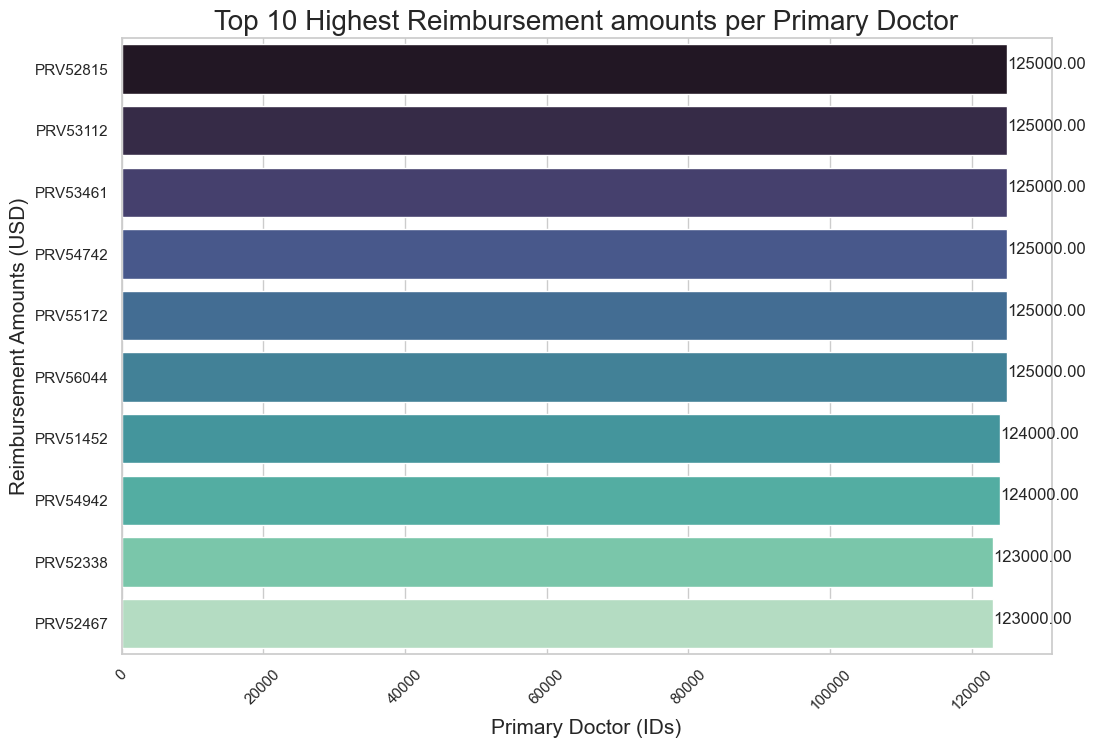

In [60]:
plot_bar_chart_with_values(in_reim_deduc_max, 'Hospital_ID', 'Max_Reimbursement',
                           title='Top 10 Highest Reimbursement amounts per Primary Doctor', 
                           x_label='Primary Doctor (IDs)', y_label='Reimbursement Amounts (USD)', orient='h', space=0.05, color = "mako")

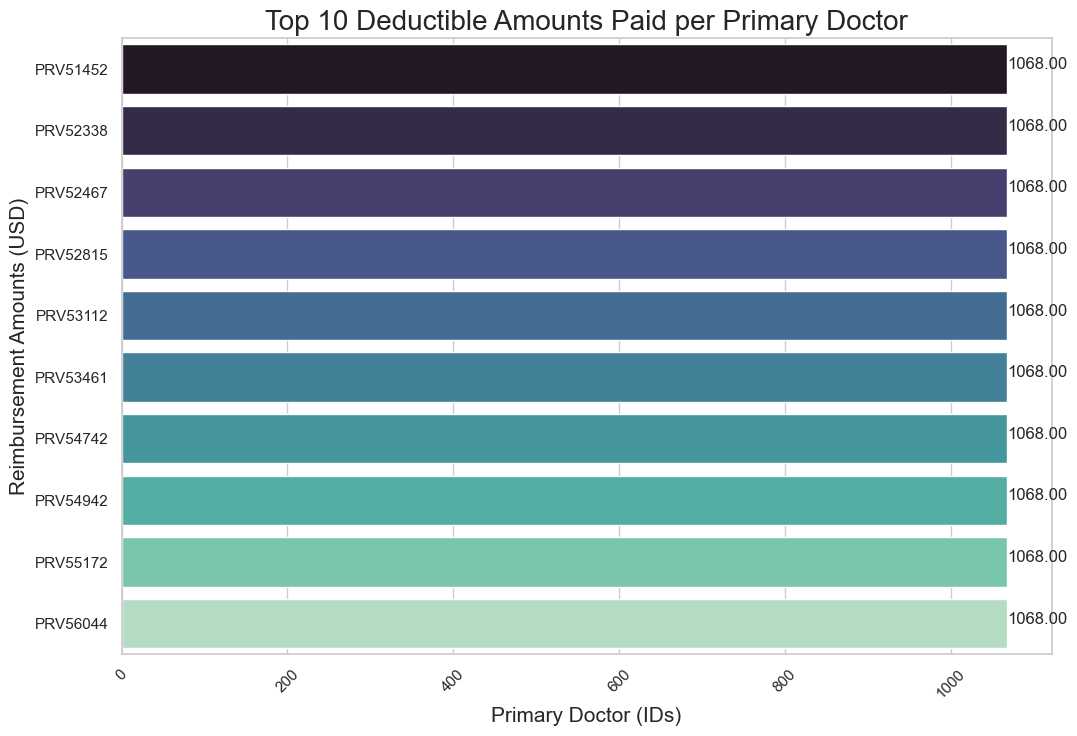

In [61]:
plot_bar_chart_with_values(in_reim_deduc_max, 'Hospital_ID', 'Max_Deductible_paid',
                           title='Top 10 Deductible Amounts Paid per Primary Doctor', 
                           x_label='Primary Doctor (IDs)', y_label='Reimbursement Amounts (USD)', orient='h', space=0.05, color = "mako")

In [62]:
out_reim_deduc_max = merged_outpatient_data[['Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]\
                        .groupby('Provider').agg(['max']).reset_index()

out_reim_deduc_max.columns=['Hospital_ID', 'Max_Reimbursement', 'Max_Deductible_paid']
out_reim_deduc_max = out_reim_deduc_max.sort_values(by=['Max_Reimbursement', 'Max_Deductible_paid'],\
                                                    ascending=False).head(10)
out_reim_deduc_max

,Hospital_ID,Max_Reimbursement,Max_Deductible_paid
3868,PRV55172,102500,876
2293,PRV53461,101250,865
109,PRV51119,95580,865
3519,PRV54766,93240,897
1962,PRV53114,85680,897
3901,PRV55205,84660,886
369,PRV51399,84460,876
5119,PRV56507,83160,897
377,PRV51407,81600,854
3715,PRV54980,80800,854


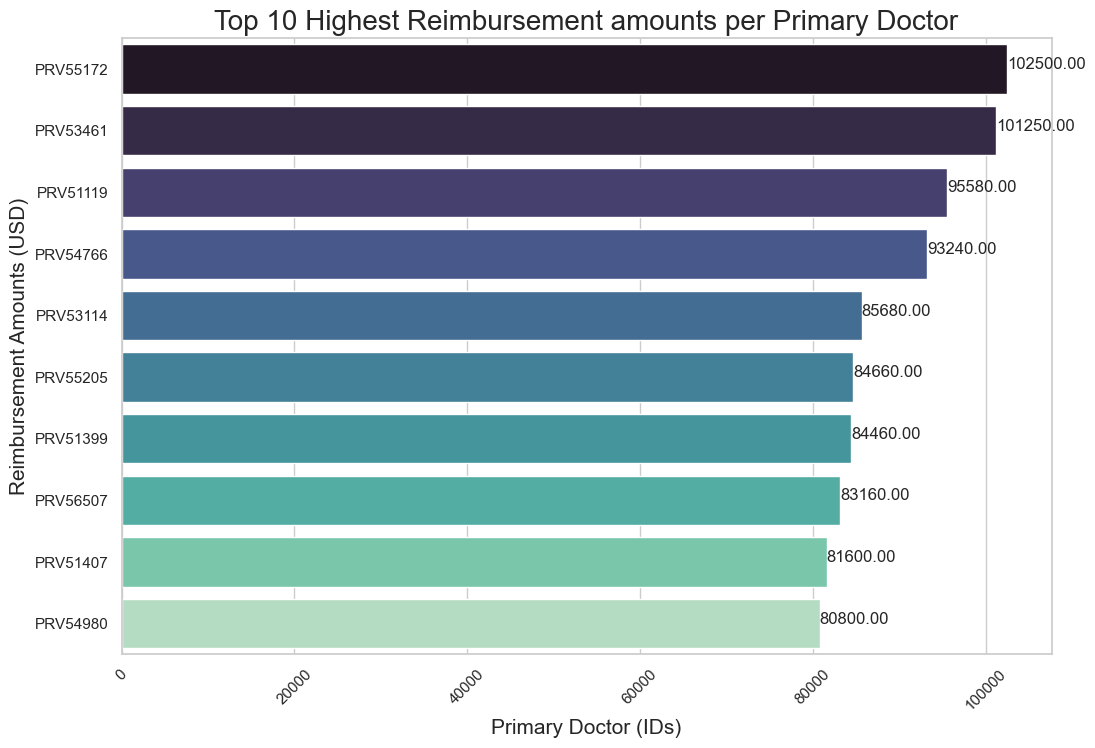

In [63]:
plot_bar_chart_with_values(out_reim_deduc_max, 'Hospital_ID', 'Max_Reimbursement',
                           title='Top 10 Highest Reimbursement amounts per Primary Doctor', 
                           x_label='Primary Doctor (IDs)', y_label='Reimbursement Amounts (USD)', orient='h', space=0.05, color = "mako")

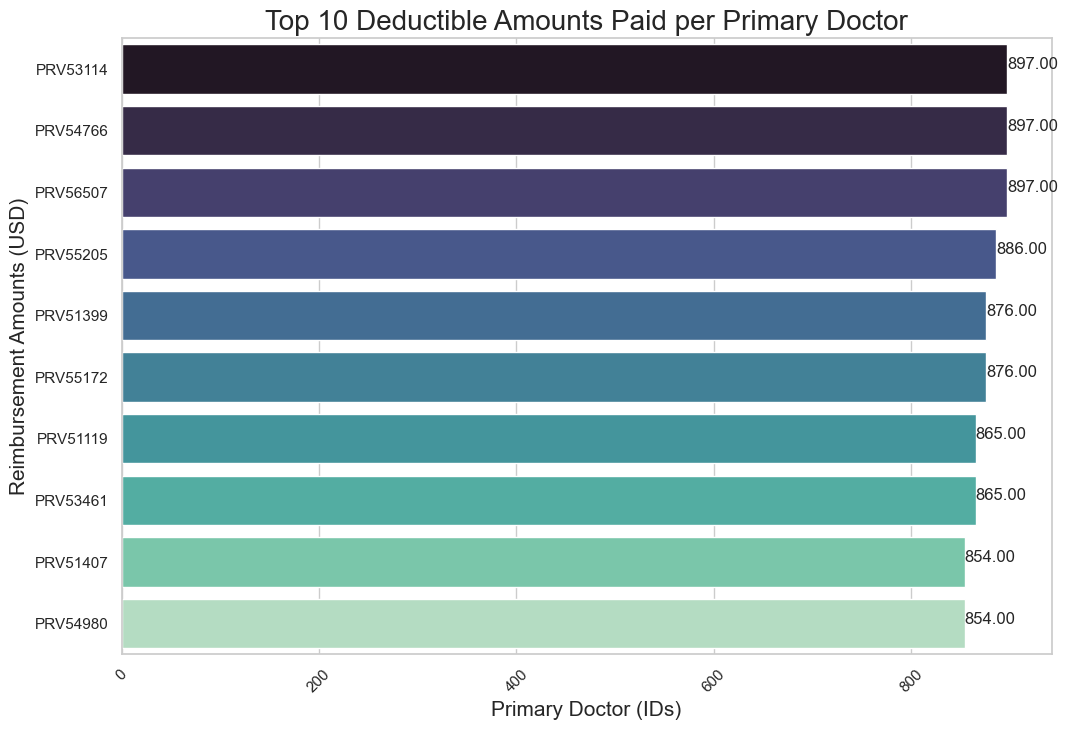

In [64]:
plot_bar_chart_with_values(out_reim_deduc_max, 'Hospital_ID', 'Max_Deductible_paid',
                           title='Top 10 Deductible Amounts Paid per Primary Doctor', 
                           x_label='Primary Doctor (IDs)', y_label='Reimbursement Amounts (USD)', orient='h', space=0.05, color = "mako")

In [65]:
# Looking at number of hospitals each beneficiary is associated with:

in_bene_prov = merged_inpatient_data[['BeneID','Provider']].drop_duplicates()
in_bene_prov = pd.DataFrame(in_bene_prov.groupby('BeneID')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
in_bene_prov.columns =['Beneficiaries', 'Inp_Affiliated_Hospitals']
in_bene_prov.head(10)

,Beneficiaries,Inp_Affiliated_Hospitals
0,BENE117116,8
1,BENE155101,7
2,BENE49263,6
3,BENE87023,6
4,BENE153349,6
5,BENE22817,6
6,BENE56659,6
7,BENE92472,6
8,BENE55497,6
9,BENE93536,5


In [66]:
# Looking at number of hospitals each beneficiary is associated with:

out_bene_prov = merged_outpatient_data[['BeneID','Provider']].drop_duplicates()
out_bene_prov = pd.DataFrame(out_bene_prov.groupby('BeneID')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
out_bene_prov.columns =['Beneficiaries', 'Out_Affiliated_Hospitals']
out_bene_prov.head(10)

,Beneficiaries,Out_Affiliated_Hospitals
0,BENE40202,22
1,BENE153509,22
2,BENE122143,21
3,BENE131419,19
4,BENE146647,19
5,BENE122118,19
6,BENE126752,19
7,BENE140999,19
8,BENE29081,18
9,BENE84924,18


In [67]:
# Do any beneficiaries have both inpatient and outpatient claims?

common_ben_df = in_bene_prov.merge(out_bene_prov, on='Beneficiaries').\
                             sort_values(by=['Inp_Affiliated_Hospitals',\
                                             'Out_Affiliated_Hospitals']\
                                         ,ascending=[False, False])

common_ben_df

,Beneficiaries,Inp_Affiliated_Hospitals,Out_Affiliated_Hospitals
0,BENE117116,8,6
1,BENE155101,7,6
6,BENE56659,6,9
2,BENE49263,6,7
3,BENE87023,6,7
...,...,...,...
33521,BENE149745,1,1
33522,BENE149743,1,1
33524,BENE149730,1,1
33531,BENE149682,1,1


In [68]:
# Hospitals in-patient doctors are associated wuth
in_doc_prov = merged_inpatient_data[['AttendingPhysician','Provider']].drop_duplicates()
in_doc_prov = pd.DataFrame(in_doc_prov.groupby('AttendingPhysician')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
in_doc_prov.drop(in_doc_prov.index[[0]], inplace=True)
in_doc_prov.columns =['Primary_Doctor', 'Affiliated_Hospitals']
in_doc_prov

,Primary_Doctor,Affiliated_Hospitals
1,PHY321249,3
2,PHY421048,3
3,PHY339652,3
4,PHY391612,3
5,PHY347943,3
...,...,...
14168,PHY352186,1
14169,PHY352194,1
14170,PHY352202,1
14171,PHY352204,1


In [69]:
inpdoc_lst = ['PHY321249', 'PHY421048', 'PHY339652', 'PHY391612', 'PHY347943']
df1 = merged_inpatient_data[merged_inpatient_data.AttendingPhysician.isin(inpdoc_lst)]\
               [['AttendingPhysician','Provider']].drop_duplicates()
df1 = df1.merge(train_data, on='Provider')
df1 = df1.groupby(['AttendingPhysician','PotentialFraud']).agg(['count']).reset_index()
df1.columns=['Primary_Doctor', 'Fraud_labels', 'Hospital_Count']
df1

,Primary_Doctor,Fraud_labels,Hospital_Count
0,PHY321249,Yes,2
1,PHY339652,No,1
2,PHY339652,Yes,1
3,PHY347943,No,1
4,PHY347943,Yes,1
5,PHY391612,No,2
6,PHY421048,No,1
7,PHY421048,Yes,2


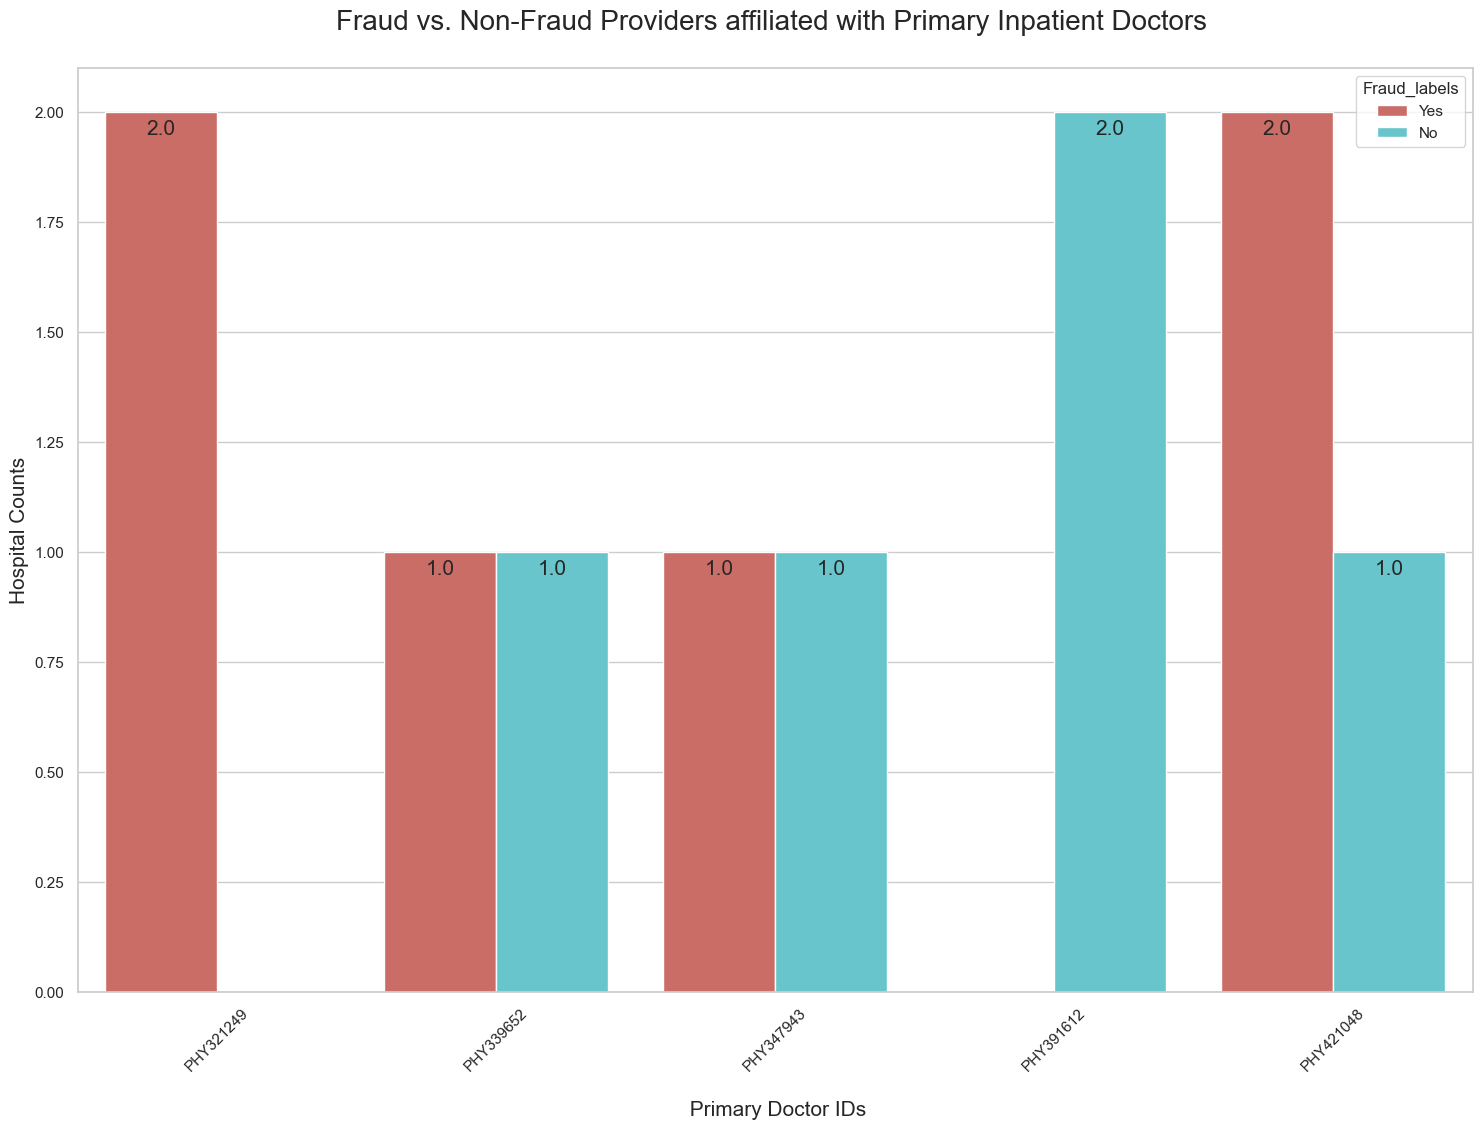

In [70]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(x="Primary_Doctor", y="Hospital_Count", hue="Fraud_labels",\
            data=df1, ci=None, palette='hls')
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=45)    
plt.xlabel("\n Primary Doctor IDs", fontsize = 15)
plt.ylabel("Hospital Counts", fontsize = 15)
plt.title("Fraud vs. Non-Fraud Providers affiliated with Primary Inpatient Doctors \n", fontsize = 20)
plt.show()

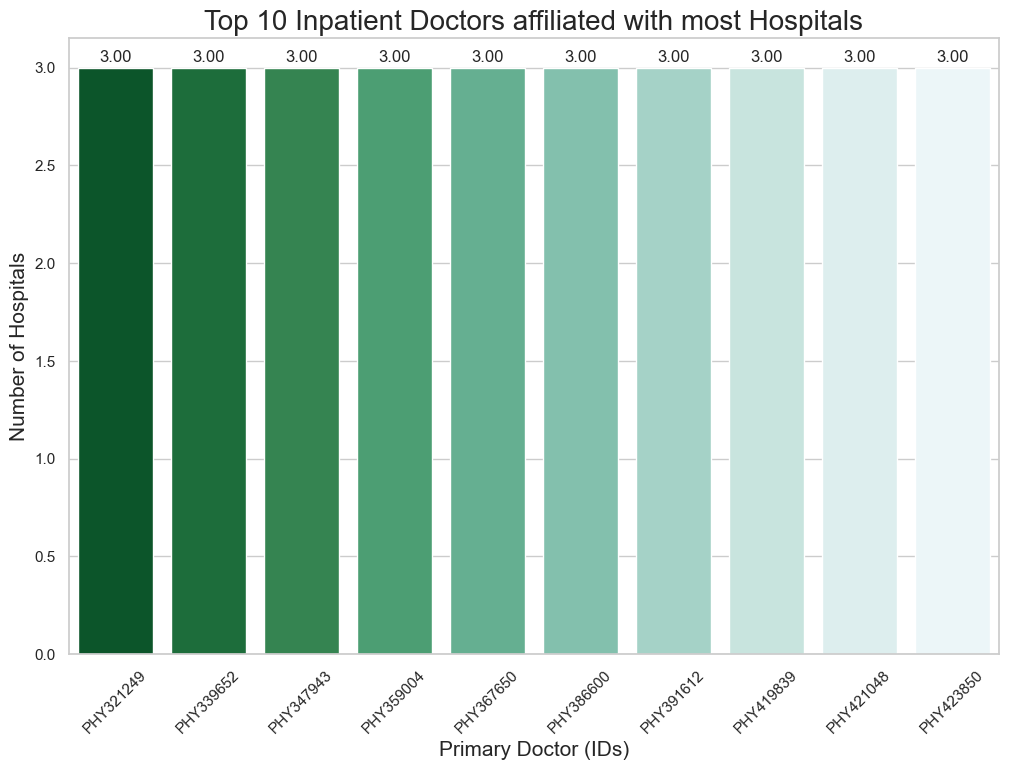

In [71]:
plot_bar_chart_with_values(data=in_doc_prov.head(10), x='Primary_Doctor', y='Affiliated_Hospitals',
                           title = 'Top 10 Inpatient Doctors affiliated with most Hospitals',
                           x_label = 'Primary Doctor (IDs)',
                           y_label = 'Number of Hospitals',
                           color="BuGn_r")

In [72]:
# Hospitals that outpatient dictors are associated with:

out_doc_prov = merged_outpatient_data[['AttendingPhysician','Provider']].drop_duplicates()
out_doc_prov = pd.DataFrame(out_doc_prov.groupby('AttendingPhysician')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
out_doc_prov.columns =['Primary_Doctor', 'Affiliated_Hospitals']
out_doc_prov.drop(out_doc_prov.index[[0]], inplace=True)
out_doc_prov

,Primary_Doctor,Affiliated_Hospitals
1,PHY342165,8
2,PHY365132,8
3,PHY417254,8
4,PHY418551,7
5,PHY389249,7
...,...,...
91146,PHY353806,1
91147,PHY353805,1
91148,PHY353804,1
91149,PHY353802,1


In [73]:
#Looking at Fraud vs Non Fraud
outpdoc_lst = ['PHY342165', 'PHY365132', 'PHY417254', 'PHY418551', 'PHY389249']
df1 = merged_outpatient_data[merged_outpatient_data.AttendingPhysician.isin(outpdoc_lst)]\
               [['AttendingPhysician','Provider']].drop_duplicates()
df1 = df1.merge(train_data, on='Provider')
df1 = df1.groupby(['AttendingPhysician','PotentialFraud']).agg(['count']).reset_index()
df1.columns=['Primary_Doctor', 'Fraud_labels', 'Hospital_Count']
df1

,Primary_Doctor,Fraud_labels,Hospital_Count
0,PHY342165,No,8
1,PHY365132,No,8
2,PHY389249,No,5
3,PHY389249,Yes,1
4,PHY417254,No,7
5,PHY418551,No,6


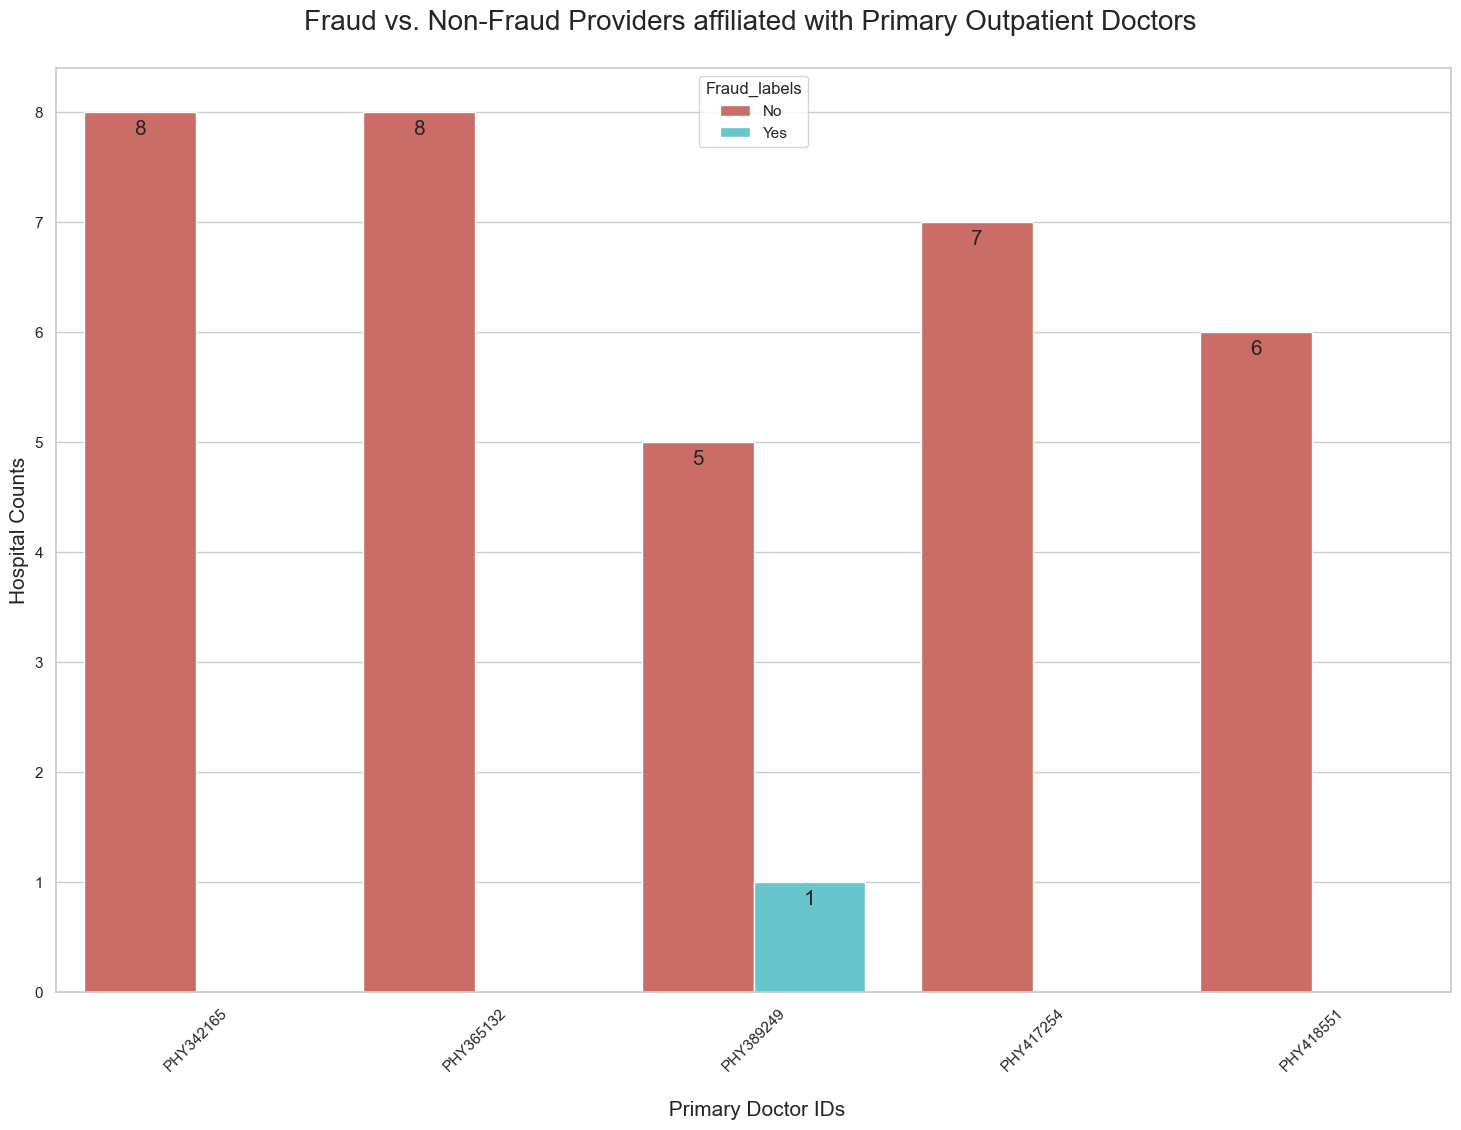

In [74]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(x="Primary_Doctor", y="Hospital_Count", hue="Fraud_labels",
                    data=df1, ci=None, palette='hls')

for p in splot.patches:
    height = p.get_height()
    if np.isnan(height):
        continue  # Skip NaN values
    splot.annotate(format(int(height)),
                   (p.get_x() + p.get_width() / 2., height), 
                   ha='center', va='center', 
                   size=15,
                   xytext=(0, -12), 
                   textcoords='offset points')

plt.xticks(rotation=45)    
plt.xlabel("\n Primary Doctor IDs", fontsize=15)
plt.ylabel("Hospital Counts", fontsize=15)
plt.title("Fraud vs. Non-Fraud Providers affiliated with Primary Outpatient Doctors \n", fontsize=20)
plt.show()

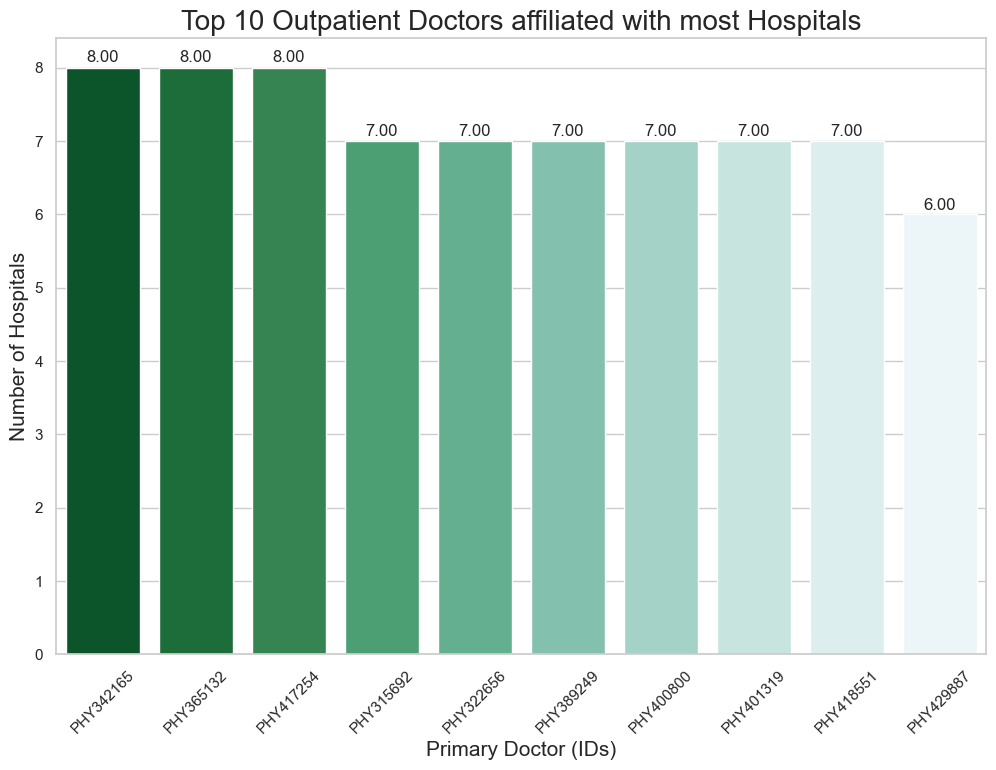

In [75]:
plot_bar_chart_with_values(data=out_doc_prov.head(10), x='Primary_Doctor', y='Affiliated_Hospitals',
                           title = 'Top 10 Outpatient Doctors affiliated with most Hospitals',
                           x_label = 'Primary Doctor (IDs)',
                           y_label = 'Number of Hospitals',
                           color="BuGn_r")

### Duplicated Claims

In [76]:
inp_df = merged_inpatient_data[['BeneID','Provider','ClaimID','AttendingPhysician','ClmAdmitDiagnosisCode',\
                 'DiagnosisGroupCode','ClmDiagnosisCode_1','ClmProcedureCode_1','InscClaimAmtReimbursed']]

# Adding fraud labels

inp_df = inp_df.merge(train_data, on='Provider')

# Narrowing down:

inp_df = inp_df.loc[inp_df.PotentialFraud == 'Yes',:]
inp_df = inp_df.loc[inp_df.InscClaimAmtReimbursed > 80000,:]

In [77]:
print(inp_df['BeneID'].duplicated().sum())
print(inp_df['AttendingPhysician'].duplicated().sum())
print(inp_df['ClmAdmitDiagnosisCode'].duplicated().sum())
print(inp_df['DiagnosisGroupCode'].duplicated().sum())
print(inp_df['ClmDiagnosisCode_1'].duplicated().sum())
print(inp_df['ClmProcedureCode_1'].duplicated().sum())

0
0
8
3
10
11


In [78]:
# Making df of interest

out_df = merged_outpatient_data[['BeneID','Provider','ClaimID','AttendingPhysician','ClmAdmitDiagnosisCode',\
                           'ClmDiagnosisCode_1','ClmProcedureCode_1','InscClaimAmtReimbursed']]

# Adding fraud labels

out_df = out_df.merge(train_data, on='Provider')

# Narrowing down:

out_df = out_df.loc[out_df.PotentialFraud == 'Yes',:]
out_df = out_df.loc[out_df.InscClaimAmtReimbursed > 80000,:]

In [79]:
print(out_df['BeneID'].duplicated().sum())
print(out_df['AttendingPhysician'].duplicated().sum())
print(out_df['ClmAdmitDiagnosisCode'].duplicated().sum())
print(out_df['ClmDiagnosisCode_1'].duplicated().sum())
print(out_df['ClmProcedureCode_1'].duplicated().sum())

0
0
1
0
0


### Feature creation and data cleaning for inpatient and outpatient data

In [80]:
# Function to create new features related to insurance data
def create_insurance_features(df):
    
    # Converting date columns to datetime format
    df['ClaimStartDt'] = pd.to_datetime(df['ClaimStartDt'])
    df['ClaimEndDt'] = pd.to_datetime(df['ClaimEndDt'])
    try:
        df['AdmissionDt'] = pd.to_datetime(df['AdmissionDt'])
        df['DischargeDt'] = pd.to_datetime(df['DischargeDt'])
    except KeyError:
        pass
    

    # Calculating hospital stay and claim duration in days
    try:
        df['Hospital_Stay'] = round(((df['DischargeDt'] - df['AdmissionDt']).dt.days))
        df['Hospital_Stay'] = df['Hospital_Stay'].astype(int)
    except KeyError:
        pass
    df['Claim_Duration'] = round(((df['ClaimEndDt'] - df['ClaimStartDt']).dt.days))
    df['Claim_Duration'] = df['Claim_Duration'].astype(int)

    # Extracting year and month from claim start date
    df['Claim_Start_Year'] = df['ClaimStartDt'].dt.year
    df['Claim_Start_Month'] = df['ClaimStartDt'].dt.month

    # Calculating insurance covered percentage
    df['Insurance_Covered_Per'] = round((df['InscClaimAmtReimbursed'] / (df['InscClaimAmtReimbursed'] + df['DeductibleAmtPaid'])) * 100, 2)
    df['Insurance_Covered_Per'] = df['Insurance_Covered_Per'].fillna(0)

    # Calculating total claim amount
    df['Total_Claim_Amt'] = (df['InscClaimAmtReimbursed'] + df['DeductibleAmtPaid'])

    # Counting total number of physicians for each beneficiary
    physician_df = df[['BeneID', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].drop_duplicates()
    physician_df = physician_df.loc[(physician_df['AttendingPhysician'] != 'None') & (physician_df['OperatingPhysician'] != 'None') & (physician_df['OtherPhysician'] != 'None')]
    physician_df = physician_df.groupby('BeneID').agg({'AttendingPhysician': 'count', 'OperatingPhysician': 'count', 'OtherPhysician': 'count'}).reset_index()
    physician_df.columns = ['Bene_ID', 'Att_cnt', 'Op_cnt', 'Othr_cnt']
    df['Physician_Count'] = physician_df['Att_cnt'] + physician_df['Op_cnt'] + physician_df['Othr_cnt']
    df['Physician_Count'] = df['Physician_Count'].fillna(0)
    df['Physician_Count'] = df['Physician_Count'].astype(int)

    # Counting claims and hospitals associated with each beneficiary
    claim_df = df[['BeneID', 'ClaimID']].groupby('BeneID').agg({'ClaimID': 'count'}).reset_index()
    claim_df.columns = ['Bene_ID', 'Cl_cnt']
    df['Claim_Count'] = claim_df['Cl_cnt']
    df['Claim_Count'] = df['Claim_Count'].fillna(0)
    df['Claim_Count'] = df['Claim_Count'].astype(int)

    provider_df = df[['BeneID', 'Provider']].drop_duplicates()
    provider_df = provider_df.groupby('BeneID').agg({'Provider': 'count'}).reset_index()
    provider_df.columns = ['Bene_ID', 'Prov_cnt']
    df['Hospital_Count'] = provider_df['Prov_cnt']
    df['Hospital_Count'] = df['Hospital_Count'].fillna(0)
    df['Hospital_Count'] = df['Hospital_Count'].astype(int)

In [81]:
create_insurance_features(train_inpatient_data)
create_insurance_features(test_inpatient_data)
create_insurance_features(train_outpatient_data)
create_insurance_features(test_outpatient_data)

In [82]:
train_inpatient_data.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'], axis=1, inplace=True)\

test_inpatient_data.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'], axis=1, inplace=True)

train_outpatient_data.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)\

test_outpatient_data.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)

In [83]:
merged_train_data = pd.concat([train_inpatient_data, train_outpatient_data],axis=0,ignore_index=True)
merged_test_data = pd.concat([test_inpatient_data, test_outpatient_data],axis=0,ignore_index=True)

In [84]:
# Train data
merged_train_data['Hospital_Stay'] = merged_train_data['Hospital_Stay'].fillna(-1)
merged_train_data['Hospital_Stay'] = merged_train_data['Hospital_Stay'].astype(int)

# Test data
merged_test_data['Hospital_Stay'] = merged_test_data['Hospital_Stay'].fillna(-1)
merged_test_data['Hospital_Stay'] = merged_test_data['Hospital_Stay'].astype(int)

In [85]:
col_list1 = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
            'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode','ClmDiagnosisCode_1',
            'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
            'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6','ClmDiagnosisCode_7',
            'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10',
            'ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3']

encode_categorical_columns(merged_train_data, col_list1)
encode_categorical_columns(merged_test_data, col_list1)

In [86]:
train_features_data = train_beneficiary_data.merge(merged_train_data, on='BeneID')
test_features_data = test_beneficiary_data.merge(merged_test_data, on='BeneID')

- Adding chronic count (per claim) feature to the complete data

In [87]:
def chr_cond_cnt(df):
    # Counting all chronic conditions per claim
    chronic_conditions = ['RenalDiseaseIndicator', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
                          'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Alzheimer',
                          'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
                          'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
    df['Chr_Cond_Count'] = df[chronic_conditions].sum(axis=1)

In [88]:
chr_cond_cnt(train_features_data)
chr_cond_cnt(test_features_data)

In [89]:
train_df = train_features_data.merge(train_data, on='Provider')

#### Saving Cleaned Data Files

In [90]:
train_df.to_csv('clean_train.csv')
test_features_data.to_csv('clean_test.csv')

In [1]:
import nbformat as nbf

def merge_notebooks(filenames):
    merged = nbf.v4.new_notebook()
    for fname in filenames:
        with open(fname) as f:
            nb = nbf.read(f, as_version=4)
            merged.cells.extend(nb.cells)
    return merged

In [4]:
notebooks_to_merge = ["healthcare-provider-fraud-detection-eda.ipynb", "Model Building and Evaluation.ipynb"]
merged_notebook = merge_notebooks(notebooks_to_merge)

with open("healthcare-provider-fraud-detection.ipynb", "w") as f:
    nbf.write(merged_notebook, f)